In [15]:
import os
import pathlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [16]:
# Path ke direktori dataset asli dan direktori untuk menyimpan gambar yang telah diproses
train_dir = pathlib.Path('train')
test_dir =  pathlib.Path('test')

# Memuat Data

## Data Train

In [17]:
# Fungsi untuk memuat data gambar
filepaths_train = list(train_dir.glob('**/*.jpg')) + list(train_dir.glob('**/*.jpeg')) + list(train_dir.glob('**/*.png'))
labels = [os.path.split(os.path.split(fp)[0])[1] for fp in filepaths_train]

# Membuat DataFrame
filepaths_train = pd.Series(filepaths_train, name='Filepath').astype(str)
labels = pd.Series(labels, name='Labels')
train_df = pd.concat([filepaths_train, labels], axis=1)

labels_distributionTotal = train_df['Labels'].value_counts()
labels_distributionTotal

Labels
tablet_kapsul      408
botol_obat         401
baterai            400
bohlam             400
termometer         400
sisa_makanan       400
pet                400
kertas             400
kardus             400
kantong_plastik    400
kaleng             400
daun               400
cangkang_telur     400
botol_aerosol      399
tissue             391
kaca               384
hdpem              360
bungkus_makanan    320
Name: count, dtype: int64

# Persebaran Labels

C:\Users\jenis\AppData\Local\Temp\ipykernel_9072\2000553567.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels_distributionTotal.index, y=labels_distributionTotal.values, palette="dark:salmon_r")


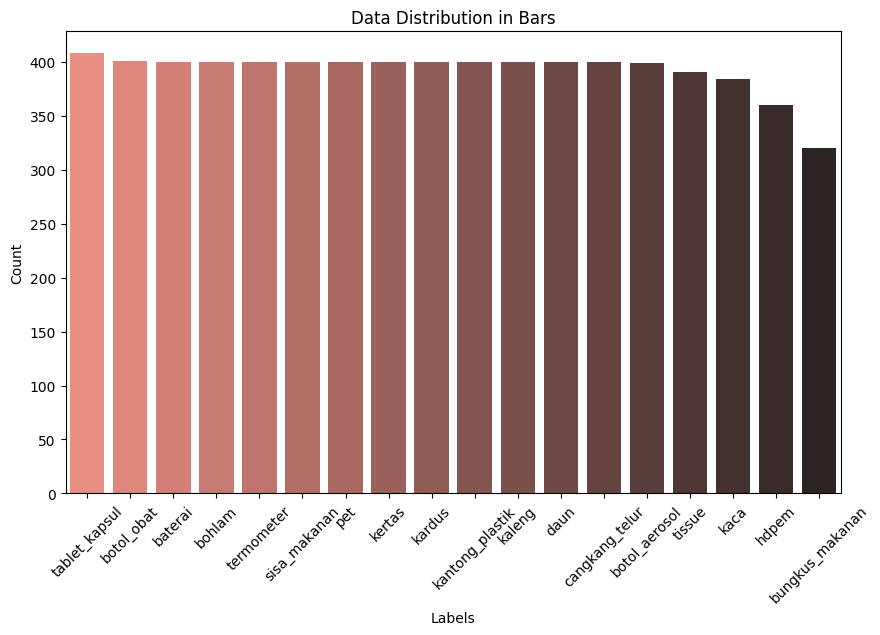

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# class_id_distributionTotal adalah Series yang berisi distribusi kelas

plt.figure(figsize=(10, 6))
sns.barplot(x=labels_distributionTotal.index, y=labels_distributionTotal.values, palette="dark:salmon_r")
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Data Distribution in Bars')
plt.xticks(rotation=45)  # Rotates labels for better readability
plt.show()


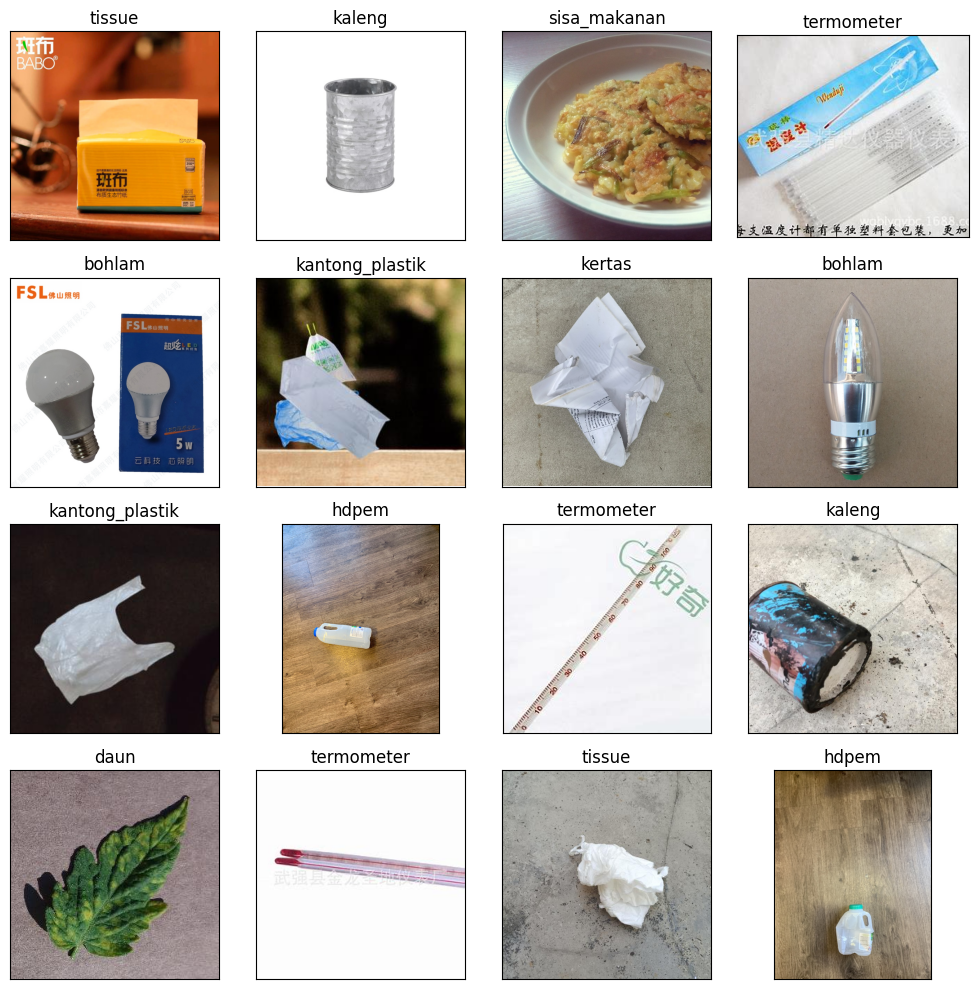

In [19]:
# Display 16 pictures of the dataset with their labels
random_index = np.random.randint(0, len(train_df), 16)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(train_df.Filepath[random_index[i]]))
    ax.set_title(train_df.Labels[random_index[i]])
plt.tight_layout()
plt.show()


## Data Test

In [20]:
# Function to sort filenames numerically
import re
def sort_numerically(filepaths):
    def extract_number(filepath):
        match = re.search(r'(\d+)', str(filepath.stem))
        return int(match.group(0)) if match else float('inf')
    return sorted(filepaths, key=extract_number)

# Function to load test images and sort them numerically
def load_test_images(test_dir):
    filepaths_test = list(test_dir.glob('*'))
    filepaths_test = [filepath for filepath in filepaths_test if filepath.is_file()]
    filepaths_test = sort_numerically(filepaths_test)
    filepaths_test = [str(filepath) for filepath in filepaths_test]
    return filepaths_test

# Load test images
filepaths_test = load_test_images(test_dir)

# Create DataFrame
test_df = pd.DataFrame(filepaths_test, columns=['Filepath'])

# Verify the DataFrame
print(test_df)

                Filepath
0        test\test_1.jpg
1        test\test_2.JPG
2        test\test_3.png
3        test\test_4.jpg
4        test\test_5.JPG
...                  ...
1764  test\test_1765.jpg
1765  test\test_1766.jpg
1766  test\test_1767.JPG
1767  test\test_1768.jpg
1768  test\test_1769.JPG

[1769 rows x 1 columns]


# Distribusi Kualitas Gambar

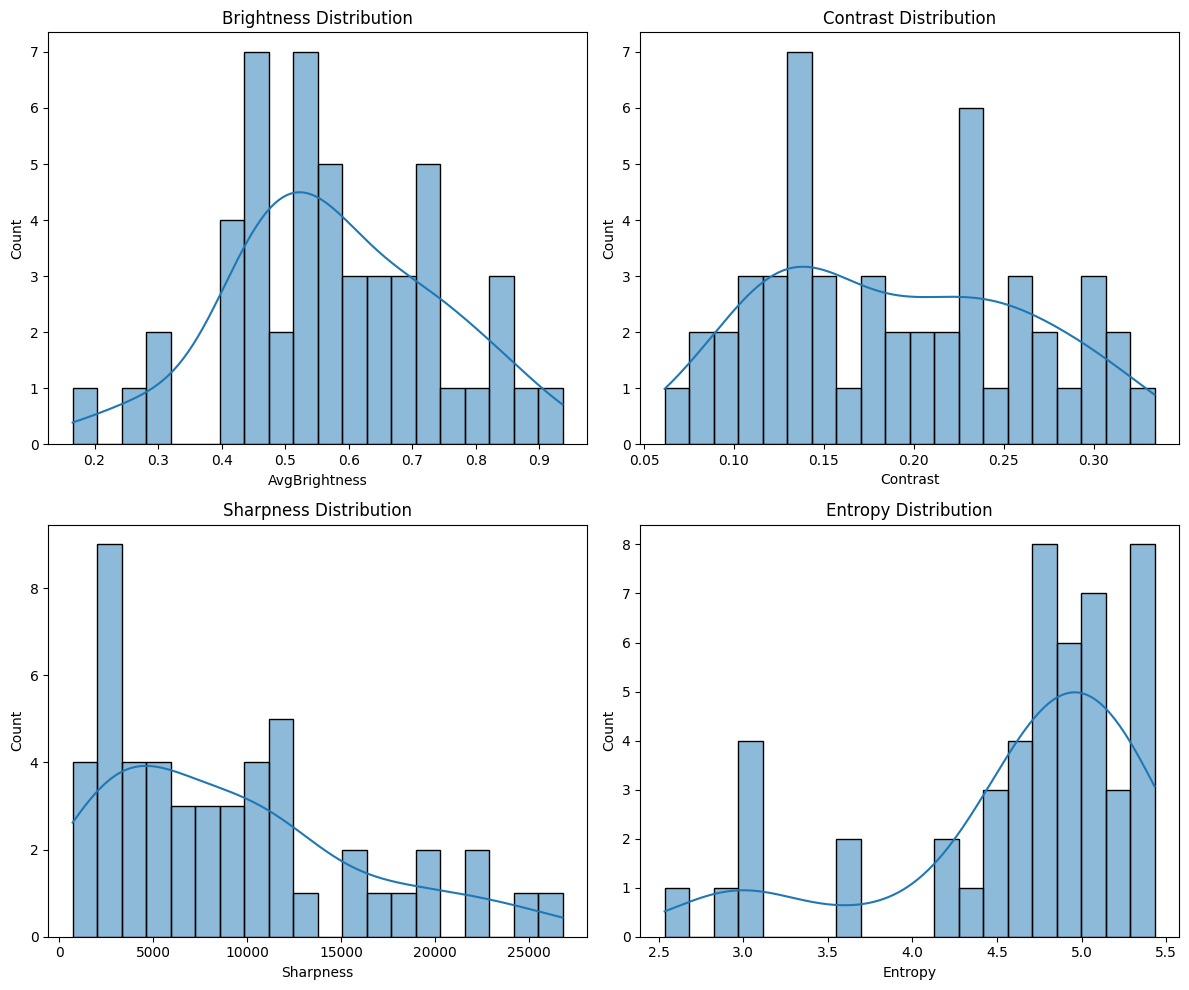

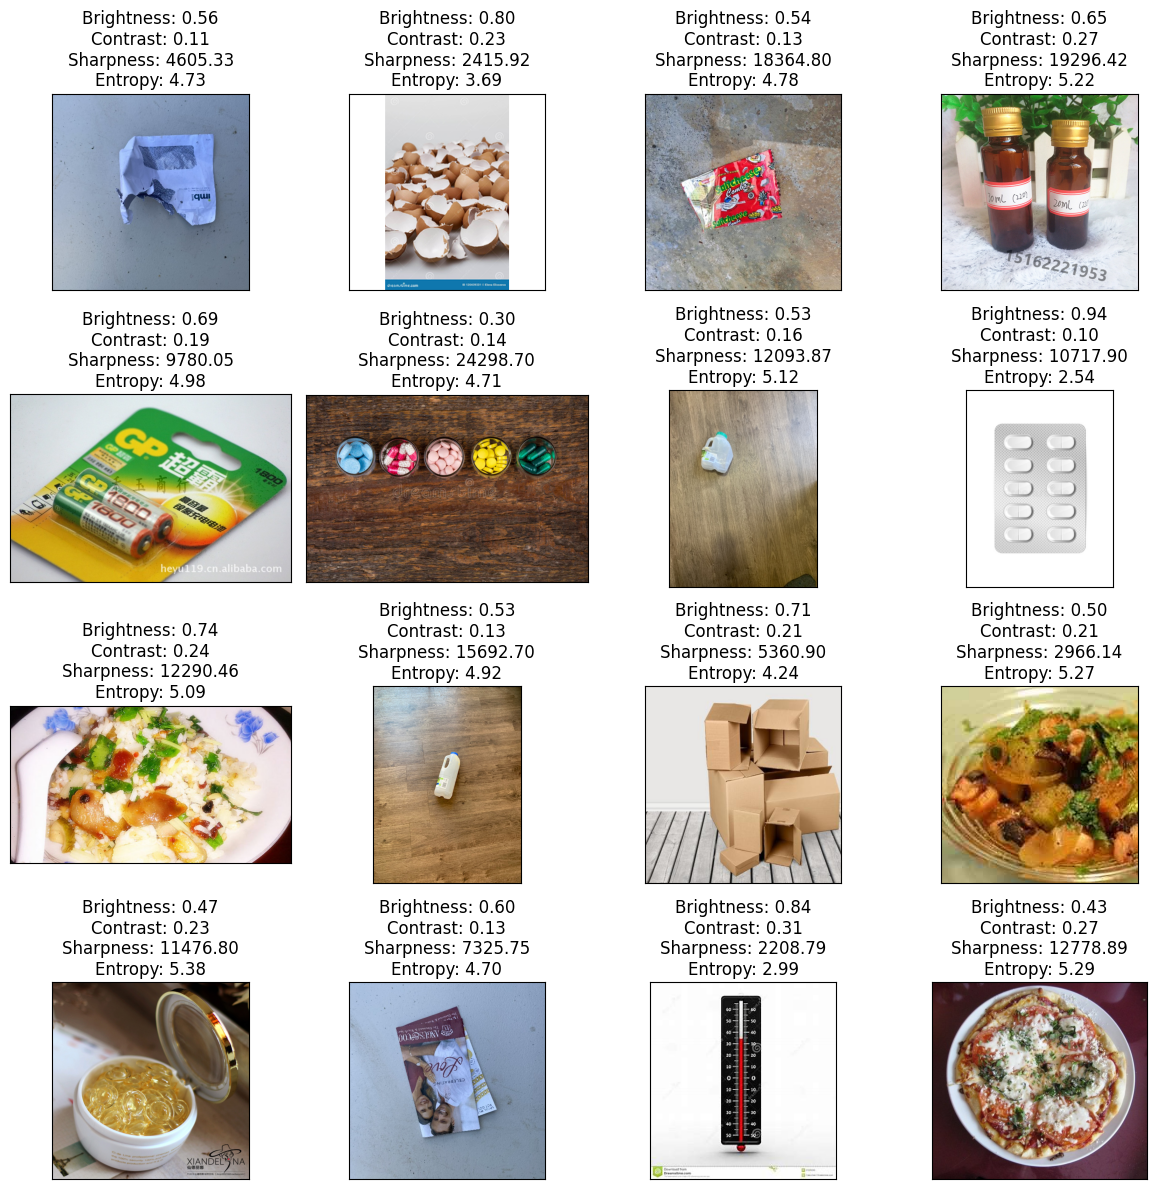

In [22]:
from skimage import io, color
from skimage.filters import sobel
from skimage.exposure import histogram
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to compute image quality metrics
def calculate_image_quality_metrics(img_path):
    img = io.imread(img_path)
    if len(img.shape) == 3:
        img_gray = color.rgb2gray(img)
    else:
        img_gray = img
    
    # Brightness: mean pixel value
    avg_brightness = np.mean(img_gray)
    
    # Contrast: standard deviation of pixel values
    img_contrast = np.std(img_gray)
    
    # Sharpness: sum of the Sobel filter response
    img_sharpness = np.sum(np.abs(sobel(img_gray)))
    
    # Entropy: entropy of the histogram
    hist, _ = histogram(img_gray)
    img_entropy = stats.entropy(hist)
    
    return avg_brightness, img_contrast, img_sharpness, img_entropy

# Select a random subset of images
subset_count = 50
chosen_indices = np.random.choice(train_df.index, subset_count, replace=False)

quality_metrics = {
    'Path': [],
    'AvgBrightness': [],
    'Contrast': [],
    'Sharpness': [],
    'Entropy': []
}

for index in chosen_indices:
    img_path = train_df.Filepath[index]
    brightness, contrast, sharpness, entropy = calculate_image_quality_metrics(img_path)
    quality_metrics['Path'].append(img_path)
    quality_metrics['AvgBrightness'].append(brightness)
    quality_metrics['Contrast'].append(contrast)
    quality_metrics['Sharpness'].append(sharpness)
    quality_metrics['Entropy'].append(entropy)

metrics_df = pd.DataFrame(quality_metrics)

# Plot histograms of the quality metrics
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

sns.histplot(metrics_df['AvgBrightness'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Brightness Distribution')

sns.histplot(metrics_df['Contrast'], bins=20, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Contrast Distribution')

sns.histplot(metrics_df['Sharpness'], bins=20, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Sharpness Distribution')

sns.histplot(metrics_df['Entropy'], bins=20, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Entropy Distribution')

plt.tight_layout()
plt.show()

# Display 16 images with their quality metrics
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(12, 12),
                         subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    index = chosen_indices[i]
    img = io.imread(train_df.Filepath[index])
    q_index = metrics_df.index[metrics_df['Path'] == train_df.Filepath[index]][0]
    ax.imshow(img)
    ax.set_title(f"Brightness: {metrics_df.iloc[q_index]['AvgBrightness']:.2f}\nContrast: {metrics_df.iloc[q_index]['Contrast']:.2f}\nSharpness: {metrics_df.iloc[q_index]['Sharpness']:.2f}\nEntropy: {metrics_df.iloc[q_index]['Entropy']:.2f}")
plt.tight_layout()
plt.show()


# Resolusi Gambar

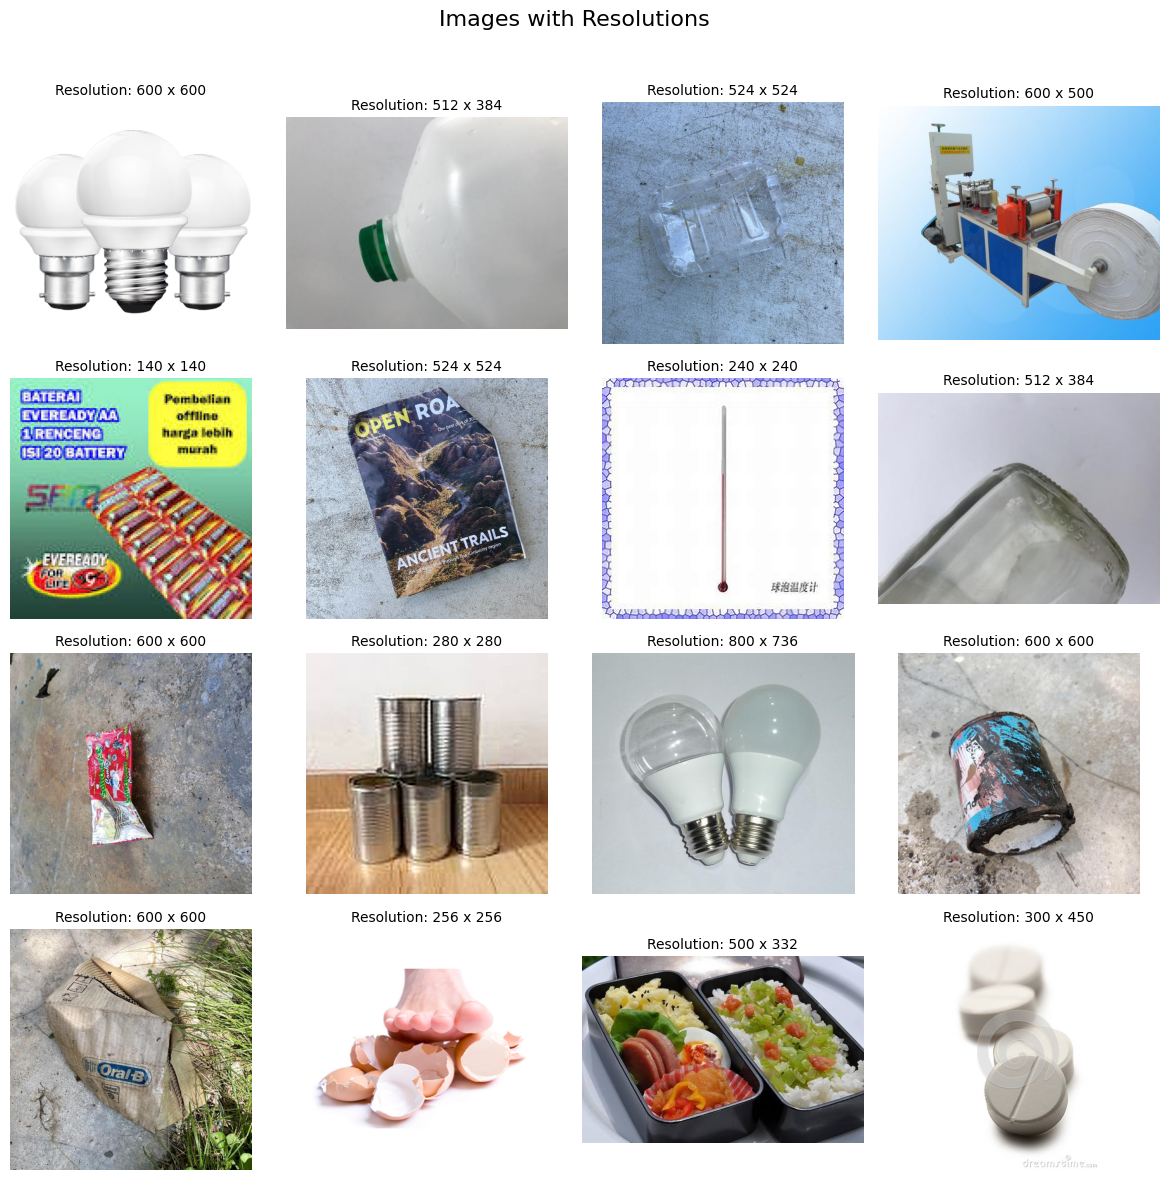

In [23]:
import matplotlib.pyplot as plt
from PIL import Image

# Function to display images with their resolutions
def show_images_with_resolutions(train_df, num_images=16):
    # Select random images
    selected_images = train_df.sample(num_images)
    
    # Display images with their resolutions
    fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(12, 12))
    fig.suptitle('Images with Resolutions', fontsize=16)

    for ax, (index, row) in zip(axes.flatten(), selected_images.iterrows()):
        image_path = row['Filepath']
        with Image.open(image_path) as img:
            ax.imshow(img)
            ax.set_title(f"Resolution: {img.width} x {img.height}", fontsize=10)
            ax.axis('off')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Display images with their resolutions
show_images_with_resolutions(train_df, num_images=16)


# Error Level Analysis

In [24]:
import os
import random
from PIL import Image, ImageChops, ImageEnhance
import numpy as np
import matplotlib.pyplot as plt

def get_random_image(dir_path):
    return os.path.join(dir_path, random.choice([f for f in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, f))]))

def compute_ela(img_path, quality=90):
    temp_file = 'temp_img.jpeg'
    img = Image.open(img_path)
    img.save(temp_file, 'JPEG', quality=quality)
    comp_img = Image.open(temp_file)
    ela_diff = ImageChops.difference(img, comp_img).convert('L')
    return np.array(ela_diff) * 15

def create_ela_image(img_path, quality=90):
    temp_file = 'temp_img.jpeg'
    img = Image.open(img_path).convert('RGB')
    img.save(temp_file, 'JPEG', quality=quality)
    comp_img = Image.open(temp_file)
    ela_img = ImageChops.difference(img, comp_img)
    scale = 255.0 / max(max(ex[1] for ex in ela_img.getextrema()), 1)
    return ImageEnhance.Brightness(ela_img).enhance(scale)

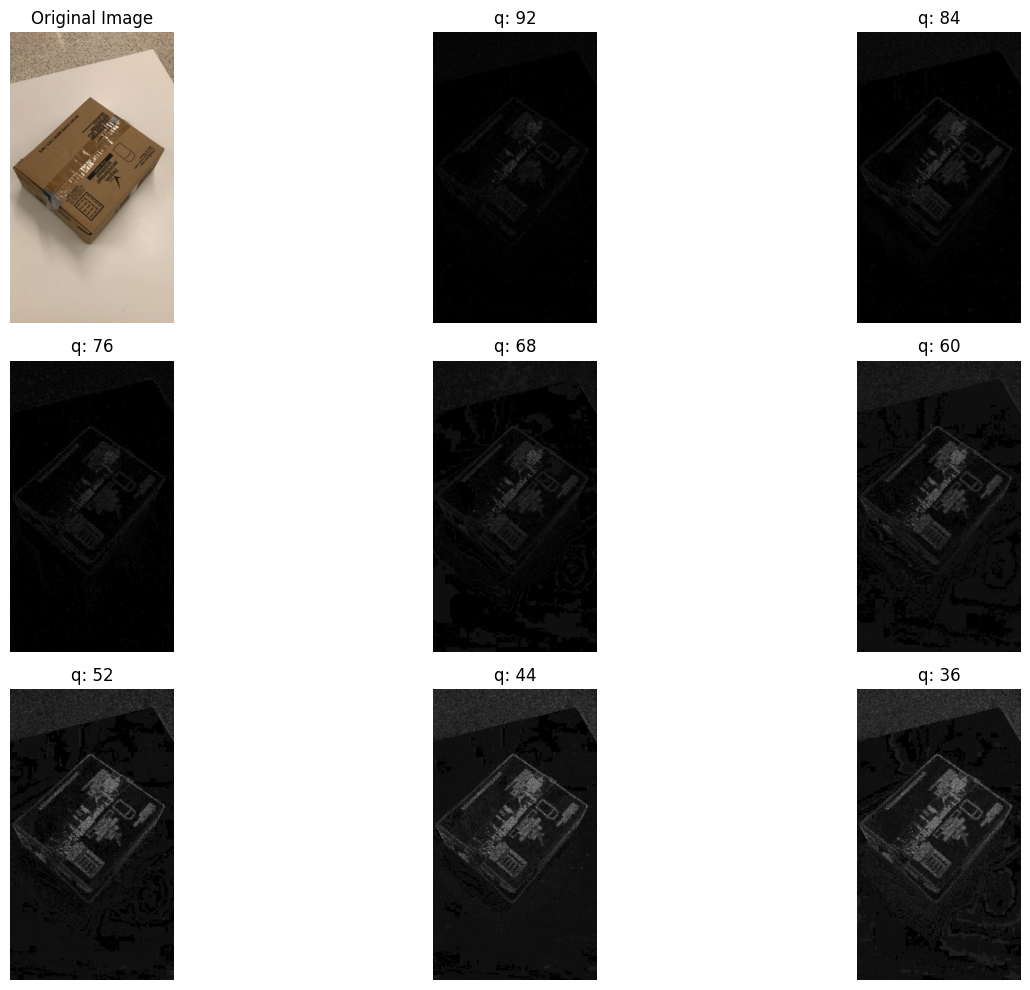

In [25]:

# Visualization
dir_path = 'train/kardus'  # Adjust path accordingly
img_path = get_random_image(dir_path)
orig_img = Image.open(img_path).convert('RGB')
qualities = [100 - i * 8 for i in range(9)]

fig, axes = plt.subplots(3, 3, figsize=(15, 10))
for ax, q in zip(axes.flat, qualities):
    if q == 100:
        ax.imshow(orig_img)
        ax.set_title('Original Image')
    else:
        ax.imshow(compute_ela(img_path, q), cmap='gray')
        ax.set_title(f'q: {q}')
    ax.axis('off')
plt.tight_layout()
plt.show()

# Training Data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Define constants
TARGET_SIZE = (224, 224)
BATCH_SIZE = 32

# Define ImageDataGenerator for training and validation with preprocessing
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,
    validation_split=0.2
)

# Define ImageDataGenerator for testing with preprocessing
test_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)


In [27]:
# Convert ImageDataGenerator to iterator
train_proses = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Labels',
    target_size=TARGET_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42,
    subset='training'
)


val_proses = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Labels',
    target_size=TARGET_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_proses = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col=None,
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    class_mode=None,  # Set class_mode to 'None' to load images without labels
    shuffle=False
)

Found 5651 validated image filenames belonging to 18 classes.
Found 1412 validated image filenames belonging to 18 classes.
Found 1769 validated image filenames.


## Augmentasi

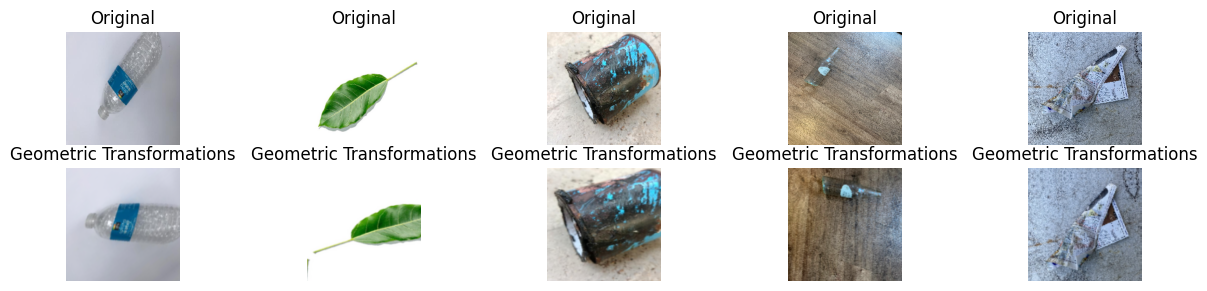

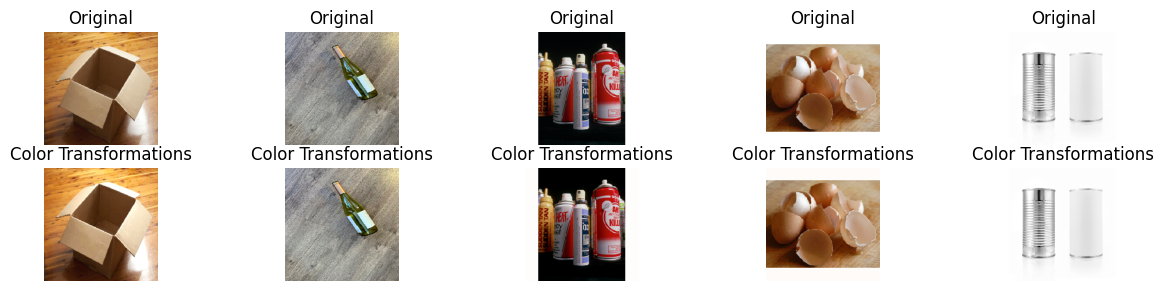

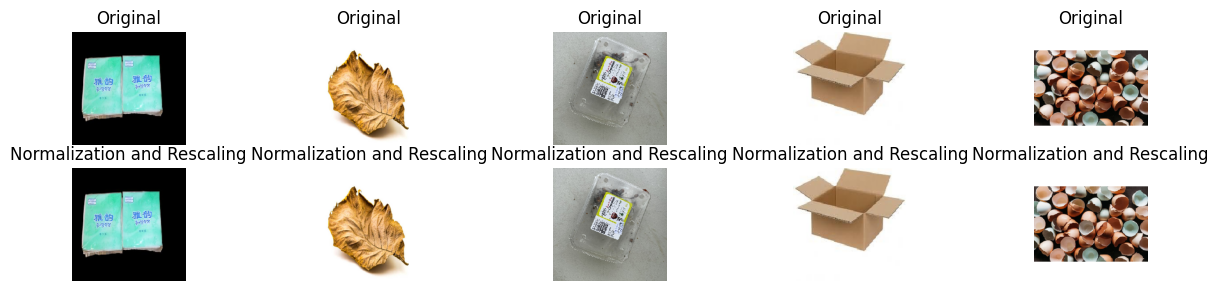

In [28]:
# Augmentation
def plot_augmentation_examples(dataset, augmentation_layer, title, num_examples=5):
    plt.figure(figsize=(15, 5))
    for i in range(num_examples):
        images, _ = next(dataset)
        augmented_images = augmentation_layer(images, training=True)
        
        # Normalize images to [0, 1] range for display
        def normalize_image(image):
            min_val = tf.reduce_min(image)
            max_val = tf.reduce_max(image)
            return (image - min_val) / (max_val - min_val)

        ax = plt.subplot(3, num_examples, i + 1)
        plt.imshow(normalize_image(images[0]).numpy())
        plt.title("Original")
        plt.axis("off")

        ax = plt.subplot(3, num_examples, i + 1 + num_examples)
        plt.imshow(normalize_image(augmented_images[0]).numpy())
        plt.title(title)
        plt.axis("off")

    plt.show()


# Define augmentation layers
geometric_augmentation = tf.keras.Sequential([
    tf.keras.layers.Resizing(224, 224),
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomWidth(0.2),
    tf.keras.layers.RandomHeight(0.2),
    tf.keras.layers.RandomCrop(200, 200)
])

color_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomContrast(0.2),
    tf.keras.layers.RandomBrightness(0.2)
])

normalization_augmentation = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255)
])

# Plot augmentation results for each group
plot_augmentation_examples(train_proses, geometric_augmentation, "Geometric Transformations")
plot_augmentation_examples(train_proses, color_augmentation, "Color Transformations")
plot_augmentation_examples(train_proses, normalization_augmentation, "Normalization and Rescaling")


In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam

# Assuming TARGET_SIZE and train_proses, val_proses are predefined
TARGET_SIZE = (224, 224)

# Model CNN dengan Transfer Learning (EfficientNet)
def create_efficientnet_model(learning_rate=0.001, dense_units=128, dropout_rate=0.45):
    pretrained_model_efficientnet = tf.keras.applications.EfficientNetB0(
        input_shape=(TARGET_SIZE[0], TARGET_SIZE[1], 3),
        include_top=False,
        weights='imagenet',
        pooling='max'
    )

    pretrained_model_efficientnet.trainable = False # mengatur semua lapisan dalam model EfficientNet yang telah dipra-latih (pretrained) untuk tidak dapat dilatih ulang selama proses pelatihan model baru

    model_efficientnet = Sequential([
        pretrained_model_efficientnet,
        Dense(dense_units, activation='relu'),
        Dropout(dropout_rate),
        Dense(dense_units, activation='relu'),
        Dense(dense_units, activation='relu'),
        Dense(18, activation='softmax')  # Adjust number of classes if needed
    ])

    model_efficientnet.compile(optimizer=Adam(learning_rate),
                               loss='categorical_crossentropy',
                               metrics=['accuracy'])
    
    return model_efficientnet

# Model CNN dari Awal (Scratch)
def create_cnn_model(learning_rate=0.001, dense_units=128, dropout_rate=0.5):
    model_cnn = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(TARGET_SIZE[0], TARGET_SIZE[1], 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, (3, 3), activation='relu'), 
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(256, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(dense_units, activation='relu'),
        Dense(dense_units, activation='relu'),
        Dense(dense_units, activation='relu'),
        Dropout(dropout_rate),
        Dense(18, activation='softmax')  # Adjust number of classes if needed
    ])

    model_cnn.compile(optimizer=Adam(learning_rate),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
    
    return model_cnn


In [35]:
# Create the models
efficientnet_model = create_efficientnet_model()
# Get model summaries
efficientnet_model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ ?                      │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,049,571 (15.45 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 4,049,571 (15.45 MB)

In [36]:

cnn_model = create_cnn_model()

cnn_model.summary()

C:\Users\jenis\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │     4,718,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 18)             │         2,322 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,142,482 (19.62 MB)

 Trainable params: 5,142,482 (19.62 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:

# Model CNN dengan Transfer Learning (EfficientNet)
def create_efficientnet_model(learning_rate=0.001, dense_units=128, dropout_rate=0.45):
    pretrained_model_efficientnet = tf.keras.applications.EfficientNetB0(
        input_shape=(TARGET_SIZE[0], TARGET_SIZE[1], 3),
        include_top=False,
        weights='imagenet',
        pooling='max'
    )

    pretrained_model_efficientnet.trainable = False

    model_efficientnet = Sequential([
        pretrained_model_efficientnet,
        Dense(dense_units, activation='relu'),
        Dropout(dropout_rate),
        Dense(dense_units, activation='relu'),
        Dense(dense_units, activation='relu'),
        Dense(18, activation='softmax')  # Adjust number of classes if needed
    ])

    model_efficientnet.compile(optimizer=Adam(learning_rate),
                               loss='categorical_crossentropy',
                               metrics=['accuracy'])
    
    return model_efficientnet

# Model CNN dari Awal (Scratch)
def create_cnn_model(learning_rate=0.001, dense_units=128, dropout_rate=0.5):
    model_cnn = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(TARGET_SIZE[0], TARGET_SIZE[1], 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, (3, 3), activation='relu'), 
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(256, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(dense_units, activation='relu'),
        Dense(dense_units, activation='relu'),
        Dense(dense_units, activation='relu'),
        Dropout(dropout_rate),
        Dense(18, activation='softmax')  # Adjust number of classes if needed
    ])

    model_cnn.compile(optimizer=Adam(learning_rate),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
    
    return model_cnn

# Define parameter grid for hyperparameter tuning
param_grid_efficientnet = {
    'learning_rate': [0.001],
    'dense_units': [256, 512],
    'dropout_rate': [0.5]
}

param_grid_cnn = {
    'learning_rate': [0.001,0.00001],
    'dense_units': [128,256],
    'dropout_rate': [0.5]
}
# Function to perform hyperparameter tuning manually
def manual_grid_search(param_grid, model_func, train_proses, val_proses):
    best_model = None
    best_accuracy = 0
    best_params = None
    best_history = None
    
    for lr in param_grid['learning_rate']:
        for units in param_grid['dense_units']:
            for dropout in param_grid['dropout_rate']:
                print(f"Training with learning_rate={lr}, dense_units={units}, dropout_rate={dropout}")
                model = model_func(learning_rate=lr, dense_units=units, dropout_rate=dropout)
                
                # menyimpan model terbaik
                checkpoint_callback = ModelCheckpoint(f"best_model_{model_func.__name__}.weights.h5",
                                                      save_weights_only=True,
                                                      monitor="val_accuracy",
                                                      save_best_only=True)
                
                #berhenti jika val_loss tidak ada perubahan
                early_stopping = EarlyStopping(monitor="val_loss",
                                               patience=2,
                                               restore_best_weights=True)
                
                #mengurangi learning rate jika tidak ada perubahan
                reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
                
                # Train the model
                history = model.fit(train_proses,
                                    validation_data=val_proses,
                                    epochs=10,
                                    callbacks=[early_stopping, checkpoint_callback, reduce_lr])
                
                # Evaluate the model
                results = model.evaluate(val_proses, verbose=0)
                accuracy = results[1]
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_model = model
                    best_params = {'learning_rate': lr, 'dense_units': units, 'dropout_rate': dropout}
                    best_history = history
    
    print(f"Best accuracy: {best_accuracy} with params: {best_params}")
    return best_model, best_params, best_history

# Perform manual grid search for EfficientNet and CNN models
best_model_efficientnet, best_params_efficientnet, history_efficientnet = manual_grid_search(param_grid_efficientnet, create_efficientnet_model, train_proses, val_proses)
best_model_cnn, best_params_cnn, history_cnn = manual_grid_search(param_grid_cnn, create_cnn_model, train_proses, val_proses)

# Choose the best model based on validation accuracy
if history_efficientnet.history['val_accuracy'][-1] > history_cnn.history['val_accuracy'][-1]:
    best_model = best_model_efficientnet
    best_params = best_params_efficientnet
    print("Transfer Learning yang terbaik.")
else:
    best_model = best_model_cnn
    best_params = best_params_cnn
    print("Scracth yang terbaik.")

Training with learning_rate=0.001, dense_units=512, dropout_rate=0.5
Epoch 1/10
 72/177 ━━━━━━━━━━━━━━━━━━━━ 1:33 886ms/step - accuracy: 0.3511 - loss: 2.9274

C:\Users\jenis\AppData\Roaming\Python\Python312\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


177/177 ━━━━━━━━━━━━━━━━━━━━ 228s 1s/step - accuracy: 0.5075 - loss: 2.0172 - val_accuracy: 0.0616 - val_loss: 10.3574 - learning_rate: 0.0010
Epoch 2/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 184s 1s/step - accuracy: 0.8163 - loss: 0.5858 - val_accuracy: 0.0630 - val_loss: 8.7985 - learning_rate: 0.0010
Epoch 3/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 185s 1s/step - accuracy: 0.8643 - loss: 0.4372 - val_accuracy: 0.0786 - val_loss: 9.2815 - learning_rate: 0.0010
Epoch 4/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 180s 1s/step - accuracy: 0.8893 - loss: 0.3484 - val_accuracy: 0.0694 - val_loss: 10.2408 - learning_rate: 0.0010
Epoch 5/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 182s 1s/step - accuracy: 0.8976 - loss: 0.3158 - val_accuracy: 0.0722 - val_loss: 9.7860 - learning_rate: 0.0010
Epoch 6/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 182s 1s/step - accuracy: 0.9310 - loss: 0.2182 - val_accuracy: 0.0800 - val_loss: 11.0313 - learning_rate: 2.0000e-04
Epoch 7/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 181s 1s/step - accuracy: 0.9589 - loss: 0.1320

C:\Users\jenis\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 360s 2s/step - accuracy: 0.0985 - loss: 11.5648 - val_accuracy: 0.0000e+00 - val_loss: 4.6557 - learning_rate: 0.0010
Epoch 2/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 355s 2s/step - accuracy: 0.2351 - loss: 2.4158 - val_accuracy: 0.0064 - val_loss: 5.1775 - learning_rate: 0.0010
Epoch 3/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 343s 2s/step - accuracy: 0.3258 - loss: 2.1194 - val_accuracy: 0.0057 - val_loss: 6.8146 - learning_rate: 0.0010
Epoch 4/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 343s 2s/step - accuracy: 0.4183 - loss: 1.8579 - val_accuracy: 0.0028 - val_loss: 8.6066 - learning_rate: 0.0010
Epoch 5/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 349s 2s/step - accuracy: 0.4952 - loss: 1.6054 - val_accuracy: 0.0120 - val_loss: 8.6126 - learning_rate: 2.0000e-04
Epoch 6/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 349s 2s/step - accuracy: 0.5440 - loss: 1.4241 - val_accuracy: 0.0120 - val_loss: 9.0209 - learning_rate: 2.0000e-04
Training with learning_rate=0.001, dense_units=256, dropout_rate=0.5


Dapat dilihat jika output yang dihasilkan dari code tersebut adalah **Transfer Learning yang terbaik**. Ini dilihat berdasarkan pada akurasi dari transfer learning lebih tinggi dari scratch. Hal ini karena pada Transfer learning terdapat pre-trained dengan ImageNet yang membuat hasilnya lebih optimal. Kemudian Transfer Learning juga memiliki arsitektur yang dapat mencegah terjadinya overfitting, sehingga hasil prediksi dapat lebih maksimal.

In [32]:
LABELS = list(train_proses.class_indices.keys())
# Predict on test data
predictions = best_model.predict(test_proses)
predicted_labels = np.argmax(predictions, axis=1)
predicted_labels = [LABELS[label] for label in predicted_labels]

# Create submission dataframe
test_filenames = test_proses.filenames
test_filenames = [os.path.basename(filename) for filename in test_filenames]  # Get only the filename
submission_df = pd.DataFrame({'file_name': test_filenames, 'label': predicted_labels})

submission_df

C:\Users\jenis\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


56/56 ━━━━━━━━━━━━━━━━━━━━ 50s 809ms/step


file_name            label
0        test_1.jpg    tablet_kapsul
1        test_2.JPG            hdpem
2        test_3.png    botol_aerosol
3        test_4.jpg  kantong_plastik
4        test_5.JPG             daun
...             ...              ...
1764  test_1765.jpg       termometer
1765  test_1766.jpg    tablet_kapsul
1766  test_1767.JPG            hdpem
1767  test_1768.jpg             kaca
1768  test_1769.JPG            hdpem

[1769 rows x 2 columns]

In [ ]:
# submission_df.to_csv('submission.csv', index=False)

In [ ]:
# Print test results of the best model
results = best_model.evaluate(val_proses, verbose=0)
print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.17727
Test Accuracy: 95.82%


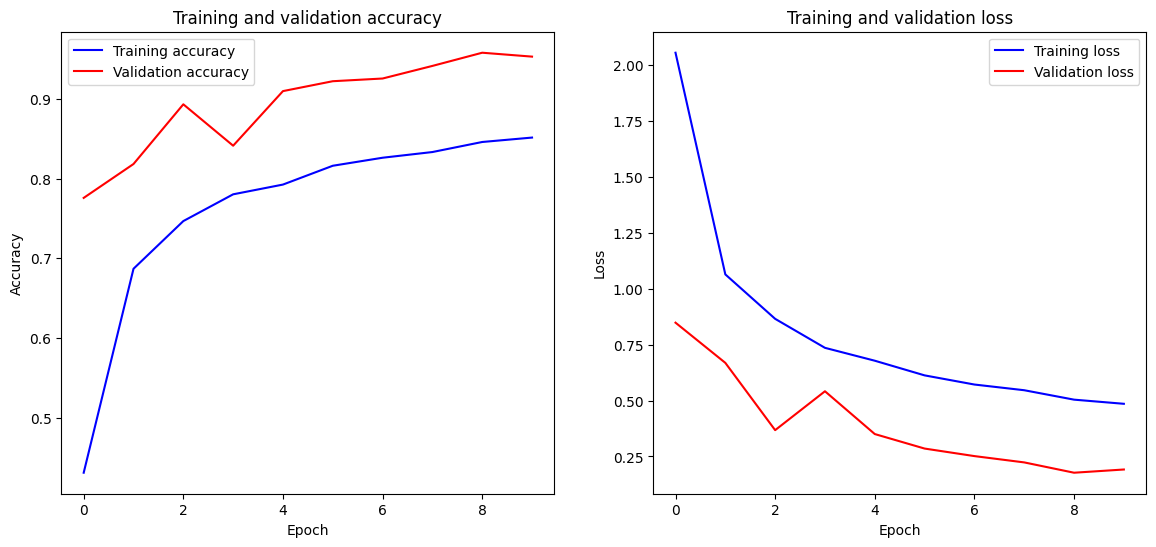

In [ ]:
# Plot training & validation accuracy values for the best model
accuracy = history_efficientnet.history['accuracy'] if best_model == best_model_efficientnet else history_cnn.history['accuracy']
val_accuracy = history_efficientnet.history['val_accuracy'] if best_model == best_model_efficientnet else history_cnn.history['val_accuracy']
loss = history_efficientnet.history['loss'] if best_model == best_model_efficientnet else history_cnn.history['loss']
val_loss = history_efficientnet.history['val_loss'] if best_model == best_model_efficientnet else history_cnn.history['val_loss']

epochs = range(len(accuracy))

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

plt.show()


Akursi semakin tinggi dan loss berkurang saat epoch meningkat